This notebook is similar to dataset_generator but is used to visualize one instance for data quality.

In contrast, dataset_generator goes through all pickle files and constructs a dataset for k-fold cross validation.

In [1]:
import glob
import numpy as np
import scipy.io as sio
import pickle
import matplotlib.pyplot as plt
import pdb
from pkl_reader import *

### TODO
* [x] interpolating heading (see interpolate_heading). Added a `np.unwrap()` to prevent possible wrapping around issue
* [x] switch to ego frame (position/orientation are all zero at t = 0). Added a switch in `get_ego_trajectory_prediction_snippets()` function.
* [ ] optional: complete outlier removal in bag_processing (see "Additional Notes").  Need to check time indices.

### Data Loading

In [2]:
save_ext = 'pkl'
files_to_process = glob.glob('../examples/bags/*.%s' % save_ext)

print('Found %d files to read: %s' % (len(files_to_process), files_to_process))

Found 2 files to read: ['../examples/bags/parking_p1_t1_e2_2019-11-04-14-35-28.pkl', '../examples/bags/parking_p2_t2_e0_2019-11-04-16-36-50.pkl']


In [3]:
file_num = 0 # TODO: starting with the first matfile for now
if save_ext == 'mat':
    res_dict = sio.loadmat(files_to_process[file_num], matlab_compatible=True) 
    
elif save_ext == 'pkl':
    res_dict = pickle.load(open(files_to_process[file_num],'rb'))
else:
    raise NotImplemented("Invalid extension.")

In [4]:
goals = extract_goals(res_dict)
ego_trajectory, start_ind, switch_ind, end_ind, goal_ind = extract_full_trajectory(res_dict, goals)

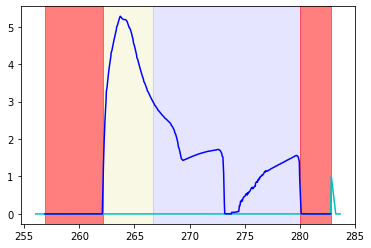

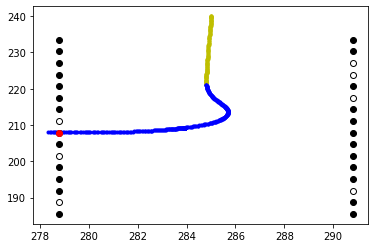

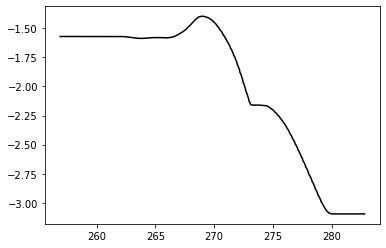

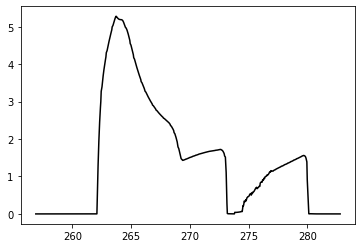

In [5]:
ego_control_dict =  extract_control_info(res_dict)

plt.figure()
plt.plot(ego_control_dict['t'], ego_control_dict['reverse'], 'c')
plt.plot(ego_trajectory[:,0], ego_trajectory[:,4], 'b')
plt.axvspan(ego_trajectory[0,0], ego_trajectory[start_ind,0], alpha=0.5, color='r')
plt.axvspan(ego_trajectory[start_ind,0], ego_trajectory[switch_ind,0], alpha=0.1, color='y')
plt.axvspan(ego_trajectory[switch_ind,0], ego_trajectory[end_ind,0], alpha=0.1, color='b')
plt.axvspan(ego_trajectory[end_ind,0], ego_trajectory[-1,0], alpha=0.5, color='r')

plt.figure()
plt.plot(ego_trajectory[start_ind:switch_ind,1], \
         ego_trajectory[start_ind:switch_ind,2], \
         'y.')
plt.plot(ego_trajectory[switch_ind:end_ind,1], \
         ego_trajectory[switch_ind:end_ind,2], \
         'b.')
for goal in goals:
    if goal[2] > 0:
        plt.plot(goal[0], goal[1], 'ko', fillstyle='none')
    else:
        plt.plot(goal[0], goal[1], 'ko')
        
plt.plot(goals[goal_ind,0], goals[goal_ind,1], 'ro')

plt.figure()
plt.plot(ego_trajectory[:,0], ego_trajectory[:,3], 'k')

plt.figure()
plt.plot(ego_trajectory[:,0], ego_trajectory[:,4], 'k')

# print(ego_trajectory[:,3])

(32, 3)
(32, 32, 3)
Feature Example
 [[ 7.568e-03  1.176e+00  3.763e-03  1.639e+00 -5.964e-03]
 [ 6.500e-03  9.601e-01  3.031e-03  2.454e+00 -8.170e-03]
 [ 4.913e-03  6.805e-01  2.127e-03  3.005e+00 -9.601e-03]
 [ 2.747e-03  3.568e-01  1.106e-03  3.395e+00 -1.061e-02]
 [ 0.000e+00  0.000e+00  0.000e+00  3.693e+00 -1.138e-02]]
Label Example
 [[-3.418e-03 -3.840e-01 -1.179e-03  3.929e+00 -1.200e-02 -1.000e+00]
 [-7.355e-03 -7.872e-01 -2.407e-03  4.132e+00 -1.253e-02 -1.000e+00]
 [-1.295e-02 -1.283e+00 -3.906e-03  4.335e+00 -1.307e-02 -1.000e+00]
 [-1.755e-02 -1.650e+00 -5.012e-03  4.467e+00 -1.342e-02 -1.000e+00]
 [-2.383e-02 -2.105e+00 -6.377e-03  4.613e+00 -1.381e-02 -1.000e+00]
 [-3.091e-02 -2.574e+00 -7.778e-03  4.749e+00 -1.417e-02 -1.000e+00]
 [-3.888e-02 -3.056e+00 -9.214e-03  4.878e+00 -1.450e-02 -1.000e+00]
 [-4.901e-02 -3.634e+00 -1.071e-02  5.016e+00 -1.118e-02 -1.000e+00]
 [-5.637e-02 -4.057e+00 -1.140e-02  5.108e+00 -6.048e-03 -1.000e+00]
 [-6.503e-02 -4.573e+00 -1.174e-02  

/home/govvijay/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


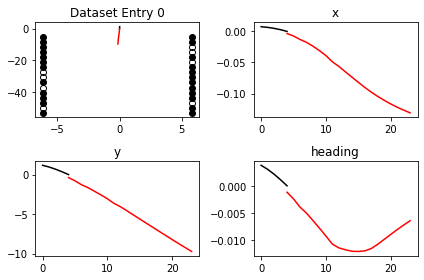

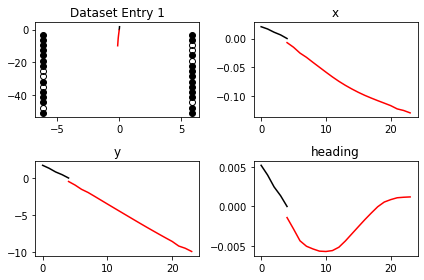

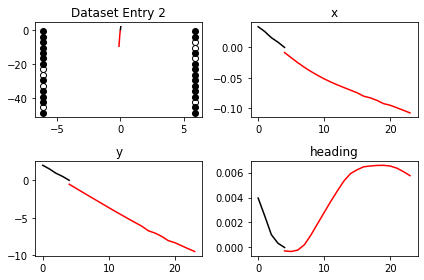

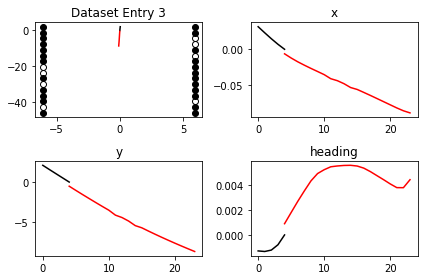

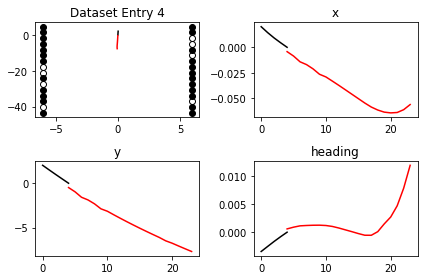

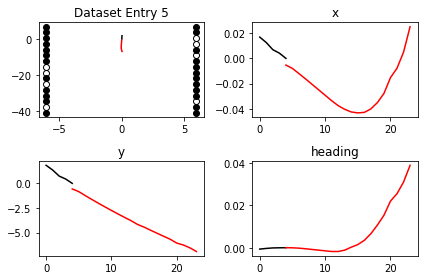

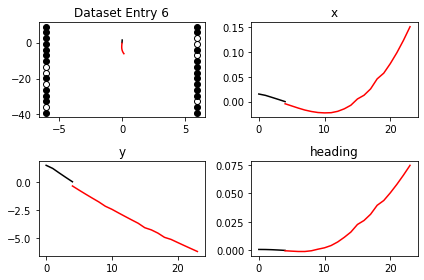

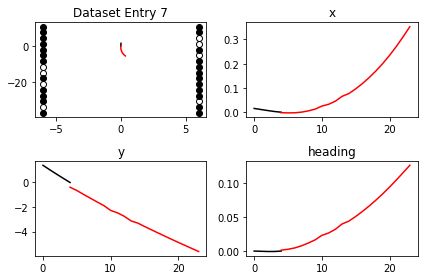

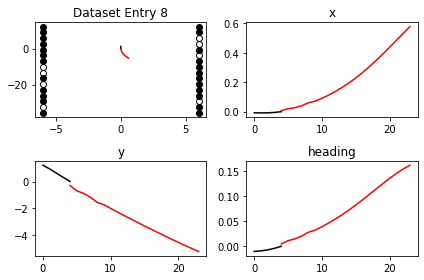

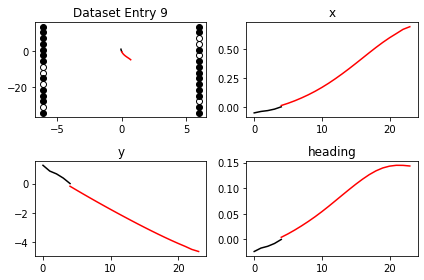

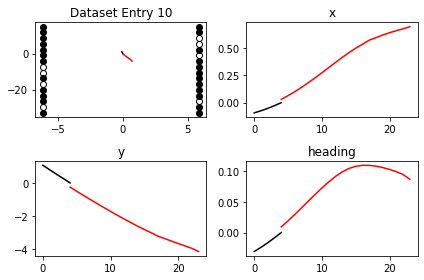

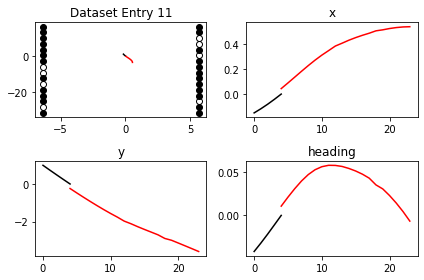

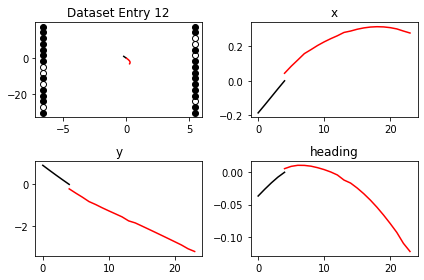

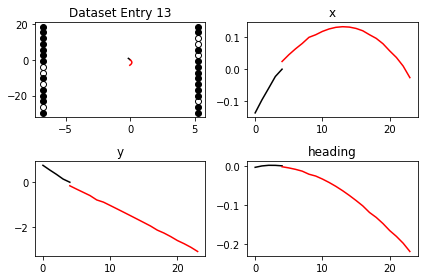

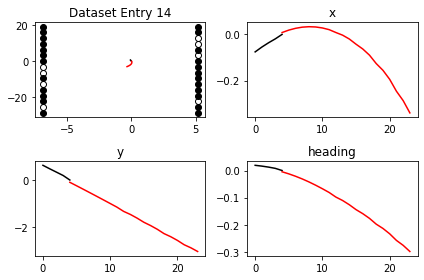

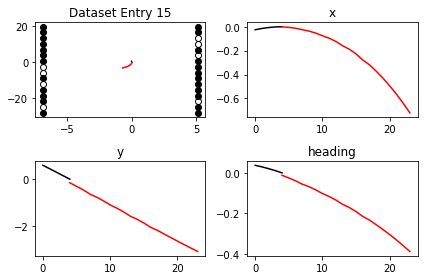

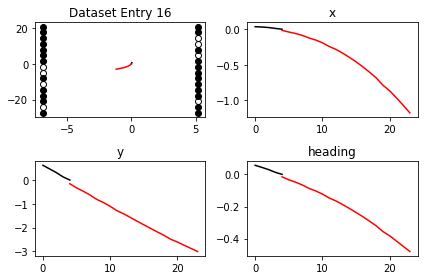

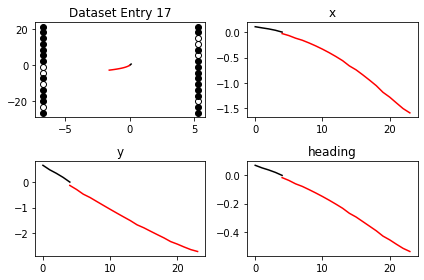

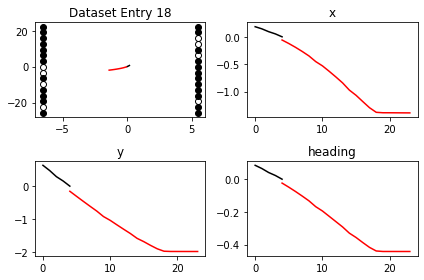

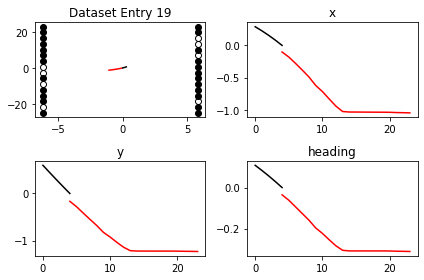

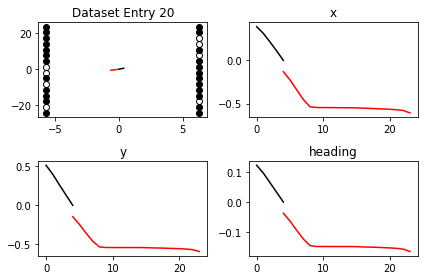

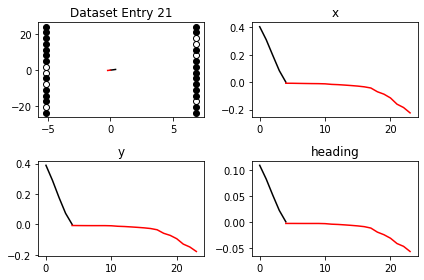

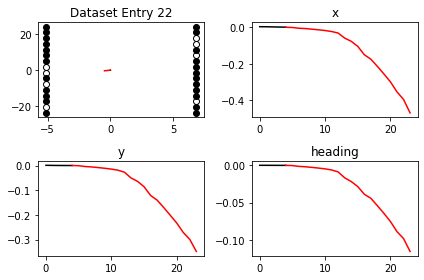

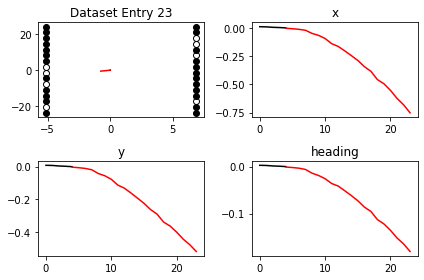

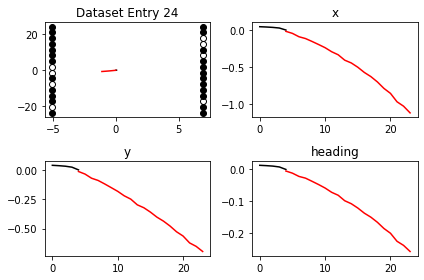

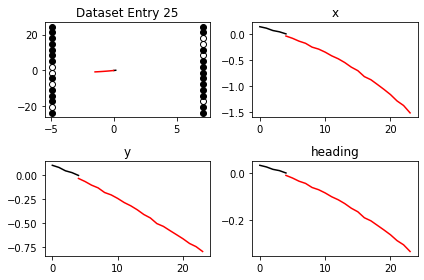

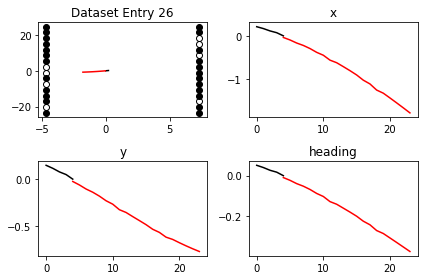

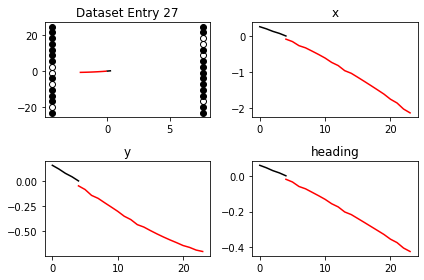

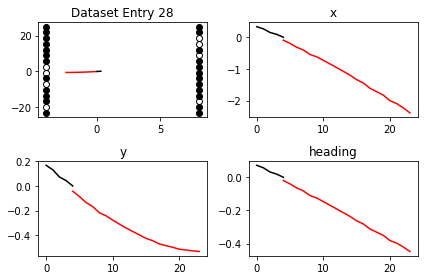

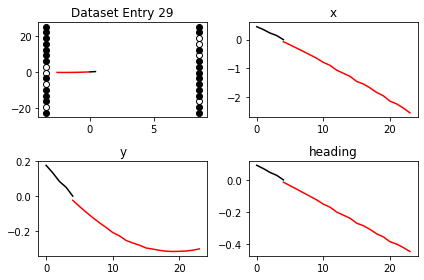

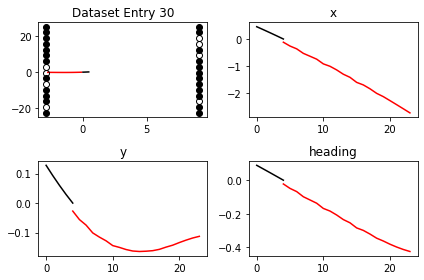

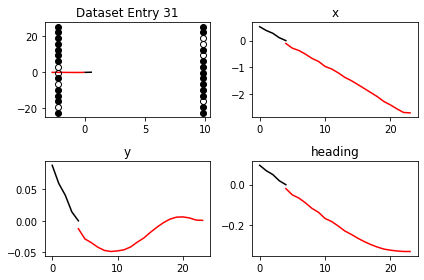

In [6]:
ego_trans = True
features, labels, goal_snpts = get_ego_trajectory_prediction_snippets(ego_trajectory, start_ind, switch_ind, end_ind, goal_ind, \
                                                          goals, ego_frame=ego_trans)

# print(goal_snpts)    

np.set_printoptions(precision=3)
print('Feature Example\n', features[0])
print('Label Example\n', labels[0])

Nhist = 5
Npred = 20

for i in range(0, len(features)):
    plt.figure()
    plt.subplot(221)
    plt.plot(features[i][:,0], features[i][:,1], 'k')
    plt.plot(labels[i][:,0], labels[i][:,1], 'r')
    
    for goal in goal_snpts[i]:
        if goal[2] > 0:
            plt.plot(goal[0], goal[1], 'ko', fillstyle='none')
        else:
            plt.plot(goal[0], goal[1], 'ko')
    plt.title('Dataset Entry %d' % i)
    
    plt.subplot(222)
    
    plt.plot(range(Nhist), features[i][:,0], 'k')
    plt.plot(range(Nhist-1, Nhist+Npred-1), labels[i][:,0], 'r')
    plt.title('x')
    
    plt.subplot(223)
    plt.plot(range(Nhist), features[i][:,1], 'k')
    plt.plot(range(Nhist-1, Nhist+Npred-1), labels[i][:,1], 'r')
    plt.title('y')
    
    plt.subplot(224)
    plt.plot(range(Nhist), features[i][:,2], 'k')
    plt.plot(range(Nhist-1, Nhist+Npred-1), labels[i][:,2], 'r')
    plt.title('heading')
    
    plt.tight_layout()